In [907]:
import os
import glob
import datetime
import importlib
import statistics
import numpy as np
import pandas as pd
from marcap import marcap_data
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from prettytable import PrettyTable

In [1110]:
#import models.pbr_gpa as model # PBR + GP/A
# import models.gpa as model
#import models.ncav as model # NCAV
#import models.pbr_psr_per_pcr as model # PBR + PCR + PER + PSR
#import models.super_quality as model
#import models.lu_zhang as model
#import models.pbr as model
#import models.pcr as model
#import models.per as model
#import models.psr as model
#import models.pbr_psr as model
#import models.psr_sales_growth as model
# import models.pbr_ob as model
import models.pbr_oa as model

importlib.reload(model)

<module 'models.pbr_oa' from '/home/pi/Documents/stock-backtesting/backtest-playground/quantitative-value/models/pbr_oa.py'>

In [1165]:
#DATA_DIR = '../data/quarterly/2-5-8-11' # quarter
# DATA_DIR = '../data/half-year/2-8' # half year
DATA_DIR = '../data/yearly/11-1'
REBALANCE = 1 # 1: yearly, 2: half-yearly 4: quarterly

In [1166]:
df_account = pd.DataFrame(columns=['start_date', 'end_date', 'filepath'])
filepaths = glob.glob(DATA_DIR + "/*.csv")
filepaths = sorted(filepaths)

In [1167]:
filepaths

['../data/yearly/11-1/2002-11-01.csv',
 '../data/yearly/11-1/2003-11-03.csv',
 '../data/yearly/11-1/2004-11-01.csv',
 '../data/yearly/11-1/2005-11-01.csv',
 '../data/yearly/11-1/2006-11-01.csv',
 '../data/yearly/11-1/2007-11-01.csv',
 '../data/yearly/11-1/2008-11-03.csv',
 '../data/yearly/11-1/2009-11-02.csv',
 '../data/yearly/11-1/2010-11-01.csv',
 '../data/yearly/11-1/2011-11-01.csv',
 '../data/yearly/11-1/2012-11-01.csv',
 '../data/yearly/11-1/2013-11-01.csv',
 '../data/yearly/11-1/2014-11-03.csv',
 '../data/yearly/11-1/2015-11-02.csv',
 '../data/yearly/11-1/2016-11-01.csv',
 '../data/yearly/11-1/2017-11-01.csv',
 '../data/yearly/11-1/2018-11-01.csv',
 '../data/yearly/11-1/2019-11-01.csv']

In [1168]:
days = []
for i in range(len(filepaths)):
    if i < len(filepaths) - 1: # exclude last item
        start_date =  os.path.basename(filepaths[i])[:-4]
        end_date =  os.path.basename(filepaths[i + 1])[:-4]
        
        day = {'start_date':start_date, 'end_date':end_date, 'filepath':filepaths[i]}
        days.append(day)

df_account = df_account.append(days)

In [1169]:
df_account

,start_date,end_date,filepath
0,2002-11-01,2003-11-03,../data/yearly/11-1/2002-11-01.csv
1,2003-11-03,2004-11-01,../data/yearly/11-1/2003-11-03.csv
2,2004-11-01,2005-11-01,../data/yearly/11-1/2004-11-01.csv
3,2005-11-01,2006-11-01,../data/yearly/11-1/2005-11-01.csv
4,2006-11-01,2007-11-01,../data/yearly/11-1/2006-11-01.csv
5,2007-11-01,2008-11-03,../data/yearly/11-1/2007-11-01.csv
6,2008-11-03,2009-11-02,../data/yearly/11-1/2008-11-03.csv
7,2009-11-02,2010-11-01,../data/yearly/11-1/2009-11-02.csv
8,2010-11-01,2011-11-01,../data/yearly/11-1/2010-11-01.csv
9,2011-11-01,2012-11-01,../data/yearly/11-1/2011-11-01.csv


In [1170]:
# 연도별 종목을 구한다.
df_account['stocks'] = df_account.apply(lambda x: 
                                        model.get_stocks(x.filepath, x.start_date,
                                                         min_market_cap=0.0, max_market_cap=0.2,
                                                         min_fund_rank=0.0, max_fund_rank=0.2, 
                                                         num_stocks=30, verbose=True), axis=1)

------------------------------
2002-11-01 ../data/yearly/11-1/2002-11-01.csv
전체 1402
지주사, 금융사 제외 1342
국외주식 제외 1342
가격정보 없는 기업 제외 964
2002-11-01 선정 기업 수 30
------------------------------
2003-11-03 ../data/yearly/11-1/2003-11-03.csv
전체 1491
지주사, 금융사 제외 1430
국외주식 제외 1430
가격정보 없는 기업 제외 1021
2003-11-03 선정 기업 수 30
------------------------------
2004-11-01 ../data/yearly/11-1/2004-11-01.csv
전체 1540
지주사, 금융사 제외 1477
국외주식 제외 1477
가격정보 없는 기업 제외 1071
2004-11-01 선정 기업 수 30
------------------------------
2005-11-01 ../data/yearly/11-1/2005-11-01.csv
전체 1630
지주사, 금융사 제외 1566
국외주식 제외 1565
가격정보 없는 기업 제외 1138
2005-11-01 선정 기업 수 30
------------------------------
2006-11-01 ../data/yearly/11-1/2006-11-01.csv
전체 1682
지주사, 금융사 제외 1616
국외주식 제외 1615
가격정보 없는 기업 제외 1193
2006-11-01 선정 기업 수 30
------------------------------
2007-11-01 ../data/yearly/11-1/2007-11-01.csv
전체 1765
지주사, 금융사 제외 1696
국외주식 제외 1691
가격정보 없는 기업 제외 1273
2007-11-01 선정 기업 수 30
------------------------------
2008-11-03 ../data/yearly/11-1/200

In [1171]:
# 연도별 수익률을 구한다.
df_account['yield'] = 0.0
df_account['yields'] = 0.0
df_account['yields'] = df_account['yields'].astype('object')
df_account['delisted'] = 0
df_account['delisted_stocks'] = df_account['yields'].astype('object')

for i in range(len(filepaths)):
    if i < len(filepaths) - 1: # exclude last item
        start_date = df_account.iloc[i].start_date
        end_date = df_account.iloc[i].end_date
        
        df_this_year = pd.read_csv(filepaths[i], dtype={"기업코드":"string", "종목코드":"string"})[['종목코드', '주가']]
        df_next_year = pd.read_csv(filepaths[i + 1], dtype={"기업코드":"string", "종목코드":"string"})[['종목코드', '주가']]
        
        stocks = df_account.iloc[i].stocks   
        yields = []
        
        # 종목별 수익률, 상장폐지 기업 수를 구한다.
        delisted = 0 # 상장폐지 기업 수
        delisted_stocks  = []
        for stock in stocks:
            start_price = df_this_year[df_this_year['종목코드'] == stock]['주가'].iloc[0]
            end_price = df_next_year[df_next_year['종목코드'] == stock]['주가']
            
            if len(end_price) == 0:
                end_price = 0
            else:                    
                end_price = end_price.fillna(0) 
                end_price = end_price.iloc[0]
                
            if end_price == 0: # 가격 정보가 없을 경우 상폐
                delisted += 1
                delisted_stocks.append(stock)
            
            # get yield
            yields.append(end_price / start_price)

        # stock 수익률들의 avg가 total 수익률이 된다. (동일 비중이기 때문에)
        mean_yields = statistics.mean(yields)
        df_account.at[i, 'yield'] = mean_yields
        df_account.at[i, 'yields'] = yields
        df_account.at[i, 'delisted'] = delisted
        df_account.at[i, 'delisted_stocks'] = delisted_stocks
        
        print(start_date, '~', end_date, ":", mean_yields)
        
        #break

2002-11-01 ~ 2003-11-03 : 0.9360182180650951
2003-11-03 ~ 2004-11-01 : 1.103173953667643
2004-11-01 ~ 2005-11-01 : 2.475528989573341
2005-11-01 ~ 2006-11-01 : 1.2202502819982004
2006-11-01 ~ 2007-11-01 : 2.946554040579504
2007-11-01 ~ 2008-11-03 : 0.5067058815943457
2008-11-03 ~ 2009-11-02 : 2.133540544859198
2009-11-02 ~ 2010-11-01 : 1.340550374630338
2010-11-01 ~ 2011-11-01 : 0.903107271650686
2011-11-01 ~ 2012-11-01 : 1.4109589719183822
2012-11-01 ~ 2013-11-01 : 1.1024391652220373
2013-11-01 ~ 2014-11-03 : 1.3190428541195647
2014-11-03 ~ 2015-11-02 : 1.4842005908628568
2015-11-02 ~ 2016-11-01 : 1.1558896790590651
2016-11-01 ~ 2017-11-01 : 1.2918405880295063
2017-11-01 ~ 2018-11-01 : 1.0620781960056322
2018-11-01 ~ 2019-11-01 : 1.4828852438062565


In [1172]:
df_account['total'] = df_account['yield'].cumprod()

In [1173]:
df_account['cagr'] = 0.0
for i, row in enumerate(df_account.iterrows()):
    df_account.at[i, 'cagr'] = pow(row[1]['total'], 1/((i+1)/REBALANCE))

In [1174]:
def get_win_rate(yield_rates):
    return sum([yield_rate > 1.0 for yield_rate in yield_rates]) / len(yield_rates)

df_account['win_rate'] = df_account.apply(lambda x: get_win_rate(x['yields']), axis=1)

In [1175]:
df_account['best_corp'] = df_account.apply(lambda x: max(x['yields']), axis=1)
df_account['worst_corp'] = df_account.apply(lambda x: min(x['yields']), axis=1)

In [1176]:
df_account['best_stock_code'] = df_account.apply(lambda x: x['stocks'][np.argmax(x['yields'])], axis=1)
df_account['worst_stock_code'] = df_account.apply(lambda x: x['stocks'][np.argmin(x['yields'])], axis=1)

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


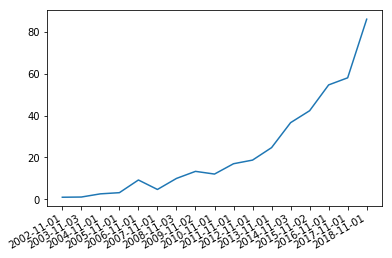

In [1177]:
fig, ax = plt.subplots()
ax.plot_date(df_account['start_date'], df_account['total'], marker='', linestyle='-')
fig.autofmt_xdate()
plt.show()

In [1178]:
cagrs = df_account['cagr']
rolling_cagrs = []
ROLLING = 3
for i in range(len(cagrs)):
    if i - 3 < 0:
        rolling_cagr = np.mean(cagrs[0:i])
    else:
        rolling_cagr = np.mean(cagrs[i - 3:i])
    rolling_cagrs.append(rolling_cagr)

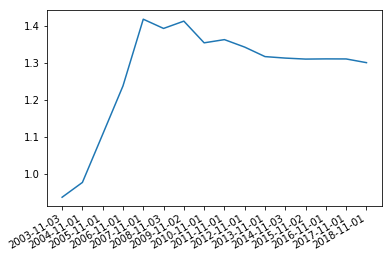

In [1179]:
fig, ax = plt.subplots()
ax.plot_date(df_account['start_date'], rolling_cagrs, marker='', linestyle='-')
fig.autofmt_xdate()
plt.show()

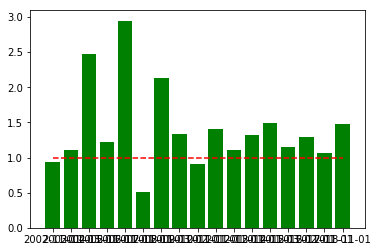

In [1180]:
# fig, ax = plt.subplots()
# ax.plot_date(df_account['start_date'], df_account['yield'])
# fig.autofmt_xdate()

plt.bar(df_account['start_date'], df_account['yield'], color='green')

h_line = np.array([1.0 for i in range(len(df_account['start_date']))])
plt.plot(df_account['start_date'], h_line, 'r--') 

plt.show()

In [1181]:
# 가격 정보가 없는 경우 상폐로 처리했음. 실제로 상폐까지는 아니고 거래정지인 경우가 있음
delisted_stocks = sum(df_account['delisted'])

In [1182]:
cagr = pow(df_account['total'][len(df_account) - 1], 1/(len(df_account)/REBALANCE))

In [1183]:
# MDD, MDD duration 구하기
max_yield = -100.0
min_yield = 0.0
mdd = 0.0
mdd_duration = 0 

dd = 0.0
dd_duration = 0
for val in df_account['total']:
    if val > max_yield:
        max_yield = val
        min_yield = val
        dd_duration = 0
        continue
    
    if val < min_yield:
        min_yield = val
        dd = (1.0 - min_yield / max_yield) * 100.0
        dd_duration += 1
        
        if dd > mdd:
            mdd = dd
        if dd_duration > mdd_duration:
            mdd_duration = dd_duration
            
if REBALANCE == 2:
    mdd_duration *= 6
elif REBALANCE == 4:
    mdd_duration *= 3

In [1184]:
# 수익률 표준편차 구하기
filetered_yield = list(df_account['yield']).copy()

# outlier 제거
filetered_yield.remove(max(filetered_yield))
filetered_yield.remove(min(filetered_yield))

std_yield = statistics.stdev(filetered_yield)

In [1185]:
# 평균 승률 
yields = []
for i in range(len(df_account)):
    yields.extend(df_account.iloc[i]['yields'])
    
win_rate = (sum([val > 1.0 for val in yields]) / len(yields)) * 100.0

In [1186]:
t = PrettyTable(['Rebalance', 'CAGR', 'MDD', 'MDD duration', 'STD', 'Delisted', 'Win rate', 'Note'])
t.add_row([os.path.basename(DATA_DIR),
           "%.2f%%" % ((cagr - 1.0) * 100.0),
           "%.2f%%" % (mdd),
           mdd_duration,
           "%.4f" % std_yield,
           delisted_stocks,
           "%.2f%%" % win_rate,
           ""
          ])
print(t)

+-----------+--------+--------+--------------+--------+----------+----------+------+
| Rebalance |  CAGR  |  MDD   | MDD duration |  STD   | Delisted | Win rate | Note |
+-----------+--------+--------+--------------+--------+----------+----------+------+
|    11-1   | 29.97% | 49.33% |      1       | 0.4271 |    9     |  63.14%  |      |
+-----------+--------+--------+--------------+--------+----------+----------+------+


In [1187]:
# 수수료 고려
df_account['fee_yield'] = df_account['yield'] * 0.99
df_account['fee_total'] = df_account['fee_yield'].cumprod()
pow(df_account['fee_total'][len(df_account) - 1], 1/(len(df_account)/REBALANCE))

1.28668832907317

In [1188]:
yearly_yields = df_account['yield'].tolist()

In [1189]:
yearly_yields

[0.9360182180650951,
 1.103173953667643,
 2.475528989573341,
 1.2202502819982004,
 2.946554040579504,
 0.5067058815943457,
 2.133540544859198,
 1.340550374630338,
 0.903107271650686,
 1.4109589719183822,
 1.1024391652220373,
 1.3190428541195647,
 1.4842005908628568,
 1.1558896790590651,
 1.2918405880295063,
 1.0620781960056322,
 1.4828852438062565]

In [1190]:
len(yearly_yields)

17

In [1191]:
# N년 후 연평균 수익률 (CAGR)이 40%를 넘을 확률
cagr_threshold = 1.35

for duration in range(1, 17):
    cagrs = []
    for i, yearly_yield in enumerate(yearly_yields[:len(yearly_yields)-duration+1]):
        total_yield = np.prod(np.array(yearly_yields[i: i+duration]))
        cagr = pow(total_yield, 1/duration)
        cagrs.append(cagr)
        
    # N년 후 CAGR이 40%를 넘는 확률
    prob = sum(np.array(cagrs) > cagr_threshold) / len(cagrs)
    
    print("{:.2f}".format(prob))

0.35
0.31
0.33
0.36
0.31
0.17
0.27
0.30
0.22
0.12
0.14
0.33
0.20
0.00
0.00
0.00
